## Annual variability of iWUE based on tree-ring data

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import os
from scipy import stats
import pymannkendall as mk
from utils import mkt
import datetime as dt

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
os.chdir('/Users/weiweizhan/Desktop/Weiwei_Zhan/Projects/WUE/')

Tree ring data

In [3]:
# folder = './Data/Tree_Ring/'
iWUE = pd.read_csv('./Data/Tree_Ring/iWUE_all_sites.csv',index_col=0)
Ci   = pd.read_csv('./Data/Tree_Ring/Ci_all_sites.csv',index_col=0)

In [4]:
Conifer   = ['COL','CAZ','SER','PED','LIL','VIG','POE',
             'NIE2','WIN','SUW','PAN','GUT','ILO','INA']
Broadleaf = ['CAV','LAI','REN','FON','NIE1','DRA','WOB','LCH','BRO']
All_sites = ['COL','CAZ','SER','PED','LIL','CAV','VIG','POE','LAI','REN','FON',
             'NIE1','NIE2','WIN','DRA','WOB','SUW','PAN','LCH','BRO','GUT','ILO','INA']

In [6]:
# set changing colors for different months
Ncolors   = 23
colormap  = plt.cm.Spectral
mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]

In [7]:
iWUE_B = iWUE[Broadleaf].values.ravel('F')
iWUE_B = iWUE_B[~np.isnan(iWUE_B)]

iWUE_C = iWUE[Conifer].values.ravel('F')
iWUE_C = iWUE_C[~np.isnan(iWUE_C)]

iWUE_all = [iWUE_B, iWUE_C]

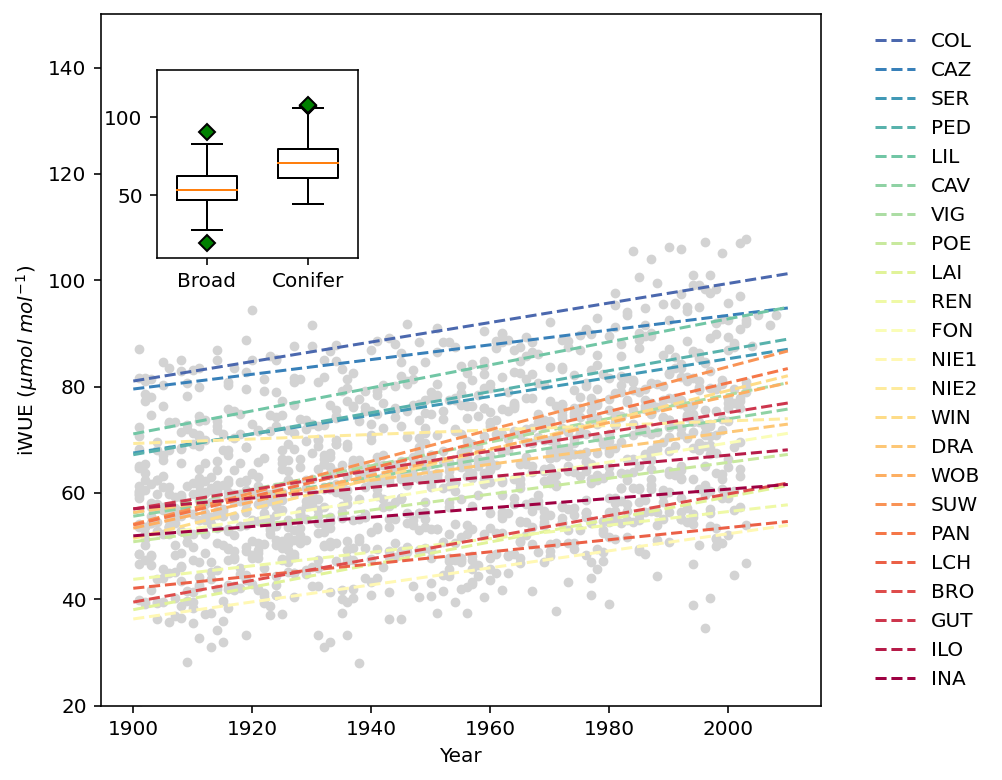

In [82]:
# record the results (slope, p-value...) of linear 
# regression & M-K test for each site 
slope_all    = []
pvalue_all   = []
tau_all      = []
p_tau        = []
senslope_all = []



from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(10,6))
ax.set_position([0.1,0.1,0.5,0.8])

axins = inset_axes(ax, width=1.4, height=1.3,loc=2, borderpad=2.8)

axins.boxplot(iWUE_all,widths=0.6, flierprops=dict(markerfacecolor='g', marker='D'))
axins.set_ylim(10,130)

axins.set_xticklabels(['Broad','Conifer'])

for (i,site) in enumerate(All_sites):
    iWUE_site = iWUE[site]
    
    # remove NAN values
    iWUE_site = iWUE_site[iWUE_site.isna()==False]
    
    # linear regression
    x = iWUE_site.index
    y = iWUE_site.values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    slope_all.append(slope)
    pvalue_all.append(p_value)
    
    # M-K test
    trend, h, p, z, Tau, s, var_s, sen_slope, intercept_mk = mk.original_test(y)
    tau_all.append(Tau)
    p_tau.append(p)
    senslope_all.append(sen_slope)
    
    # scatter plot
    ax.scatter(iWUE_site.index,iWUE_site.values,s=15,c='lightgrey')
    
    # plot the fitted line
    label = site#+', '+r'$\tau$'+'='+'{:.2f}'.format(Tau)
    line = np.linspace(1900,2010,100)
    ax.plot(line,line*slope+intercept,'--',color=mapcolors[22-i],label=label)

ax.set_ylim(20,150)
ax.set_xlabel('Year')
ax.set_ylabel('iWUE ($\mu mol$ $mol^{-1}$)')



ax.legend(bbox_to_anchor=(1.05, 1.0),frameon=False)

plt.rcParams['savefig.dpi'] = 220
T = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
# plt.savefig('./Data/figs/All_sites_iWUE_trend_'+T+'.png')

In [26]:
# for (i,site) in enumerate(All_sites):
#     print(site+', '+r'p'+'='+'{:.3f}'.format(p_tau[i]))

In [27]:
# # slope_all    
# # pvalue_all   = []
# tau_all      
# # p_tau        
# # senslope_all = []

In [42]:
tau_all = np.array(tau_all)
p_tau   = np.array(p_tau)


In [28]:
Ci_B = Ci[Broadleaf].values.ravel('F')
Ci_B = Ci_B[~np.isnan(Ci_B)]

Ci_C = Ci[Conifer].values.ravel('F')
Ci_C = Ci_C[~np.isnan(Ci_C)]

Ci_all = [Ci_B, Ci_C]

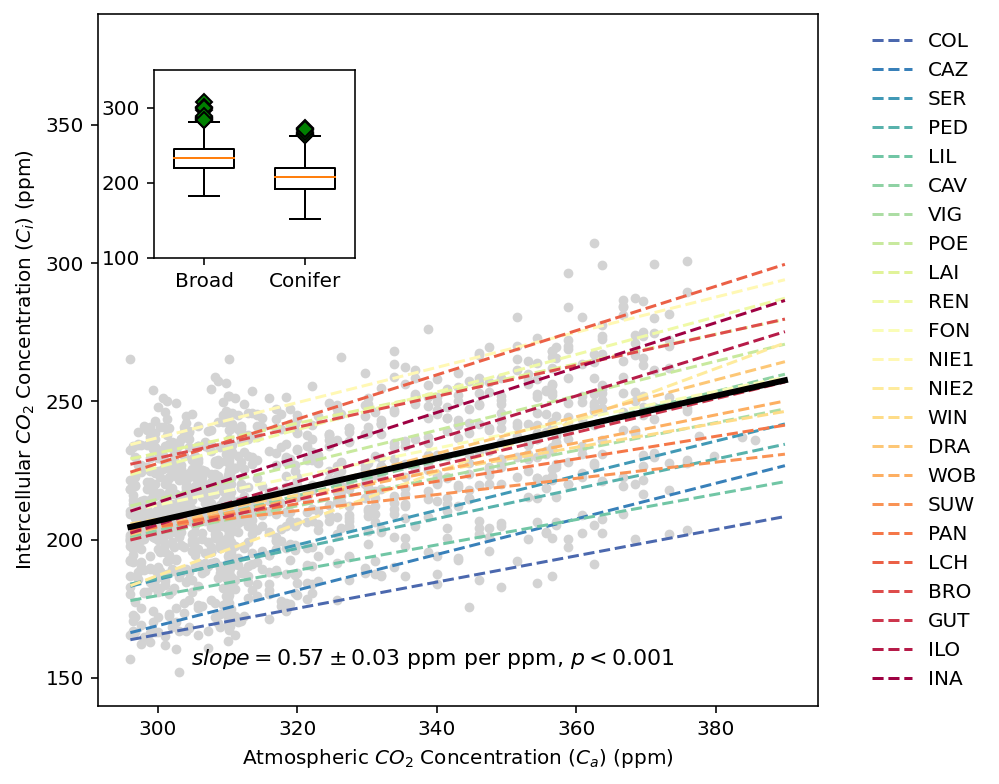

In [80]:
x_all = np.zeros([1,])
y_all = np.zeros([1,])

fig, ax = plt.subplots(figsize=(10,6))
ax.set_position([0.1,0.1,0.5,0.8])

axins = inset_axes(ax, width=1.4, height=1.3,loc=2, borderpad=2.8)

axins.boxplot(Ci_all,widths=0.6, flierprops=dict(markerfacecolor='g', marker='D'))
axins.set_ylim(100,350)

axins.set_xticklabels(['Broad','Conifer'])

minx, maxx = Ci.Ca.min(),Ci.Ca.max()
for (i,site) in enumerate(All_sites):
    Ci_site = Ci[['Ca',site]]

    # remove NAN values
    Ci_site = Ci_site[~Ci_site[site].isna()]
    
    # linear regression
    x = Ci_site.Ca.values
    y = Ci_site[site].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # scatter plot
    ax.scatter(x,y,s=15,c='lightgrey')
    
    # plot the fitted line
    line = np.linspace(minx,maxx,100)
    ax.plot(line,line*slope+intercept,'--',color=mapcolors[22-i],label=site)
    
    # accumlate all x & y
    x_all = np.concatenate([x_all,x])
    y_all = np.concatenate([y_all,y])
    
    x_all = x_all[1:]
    y_all = y_all[1:]

# add a regression line using all x & y
slope, intercept, r_value, p_value, std_err = stats.linregress(x_all, y_all)
ax.plot(line,line*slope+intercept,'-',color='black',linewidth=3)
ax.text(0.8, 0.05, f'$slope = {np.around(slope,decimals=2)}\pm {np.around(std_err,decimals=2)}$'
        +' ppm per ppm'
        +', $p<0.001$', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black',fontsize=11)
ax.set_ylim(140,390)
# fig.legend(bbox_to_anchor=(1.05, 0.9),frameon=False)
ax.set_xlabel('Atmospheric $CO_2$ Concentration ($C_a$) (ppm)')
ax.set_ylabel('Intercellular $CO_2$ Concentration ($C_i$) (ppm)')

ax.legend(bbox_to_anchor=(1.05, 1.0),frameon=False)

plt.rcParams['savefig.dpi'] = 220
T = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
# plt.savefig('./Data/figs/All_sites_Ci_Ca_'+T+'.png')

Ci/Ca Ratio

Text(0.5, 0, 'Year')

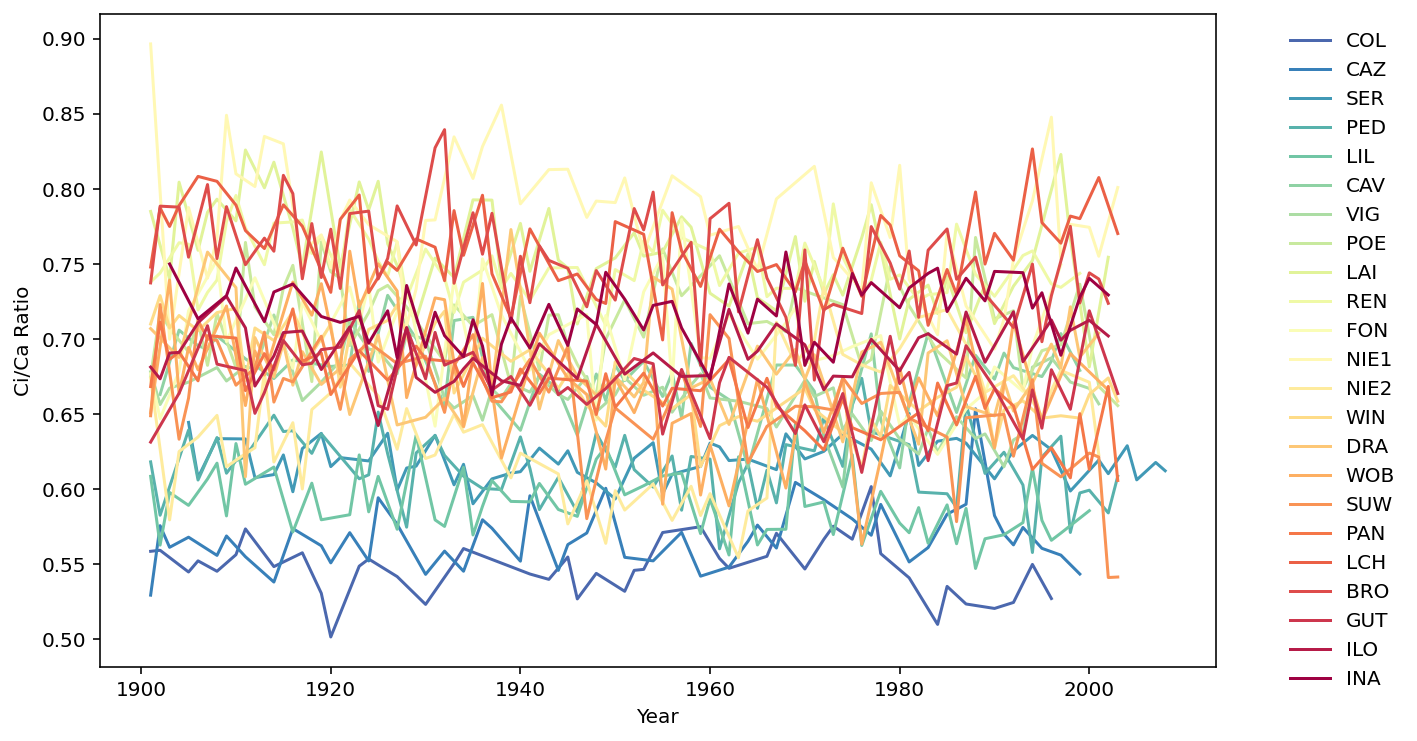

In [101]:
slope_all    = []
pvalue_all   = []
tau_all      = []
p_tau        = []
senslope_all = []


fig, ax = plt.subplots(figsize=(10,6))

# minx, maxx = Ci.Ca.min(),Ci.Ca.max()
for (i,site) in enumerate(All_sites):
    Ci_site = Ci[['Ca',site]]

    # remove NAN values
    Ci_site = Ci_site[~Ci_site[site].isna()]
    
    # compute the Ci/Ca ratio
    Ci_site['Ci/Ca'] = Ci_site[site]/Ci_site.Ca
    
    # linear regression
    x = Ci_site.index
    y = Ci_site['Ci/Ca'].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    slope_all.append(slope)
    pvalue_all.append(p_value)
    
    # M-K test
    trend, h, p, z, Tau, s, var_s, sen_slope, intercept_mk = mk.original_test(y)
    tau_all.append(Tau)
    p_tau.append(p)
    senslope_all.append(sen_slope)

    # scatter plot
    ax.plot(x,y,color=mapcolors[22-i],label=site)
    

ax.legend(bbox_to_anchor=(1.05, 1.0),frameon=False)
ax.set_ylabel('Ci/Ca Ratio')
ax.set_xlabel('Year')

# plt.rcParams['savefig.dpi'] = 220
# T = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
# plt.savefig('./Data/figs/All_sites_Ci_Ca_'+T+'.png')